In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataframe = pd.read_csv("zomato.csv")
print(dataframe.head())

                                                 url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table   rate  votes                             phone  \
0          Yes        Yes  4.1/5    775    080 42297555\r\n+91 9743772233   
1          Yes         No  4.1/5  

**EDA**

In [28]:
dataframe.describe()

,rate,votes,approx_cost(for two people)
count,41665.000000,41665.000000,41665.000000
mean,3.700449,351.653018,602.655850
std,0.440513,881.800960,463.017327
min,1.800000,0.000000,40.000000
25%,3.400000,21.000000,300.000000
50%,3.700000,73.000000,500.000000
75%,4.000000,276.000000,700.000000
max,4.900000,16832.000000,6000.000000


In [7]:
def handleRate(value):
    try:
        value = str(value).split('/')[0]
        return float(value)
    except:
        return np.nan

dataframe['rate'] = dataframe['rate'].apply(handleRate)
print(dataframe.head())


                                                 url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table  rate  votes                             phone  \
0          Yes        Yes   4.1    775    080 42297555\r\n+91 9743772233   
1          Yes         No   4.1    7

In [8]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   url                          51717 non-null  object 
 1   address                      51717 non-null  object 
 2   name                         51717 non-null  object 
 3   online_order                 51717 non-null  object 
 4   book_table                   51717 non-null  object 
 5   rate                         41665 non-null  float64
 6   votes                        51717 non-null  int64  
 7   phone                        50509 non-null  object 
 8   location                     51696 non-null  object 
 9   rest_type                    51490 non-null  object 
 10  dish_liked                   23639 non-null  object 
 11  cuisines                     51672 non-null  object 
 12  approx_cost(for two people)  51371 non-null  object 
 13  reviews_list    

In [9]:
print(dataframe.isnull().sum())

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                           10052
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64


In [14]:
threshold = 0.5 * len(dataframe)
dataframe = dataframe.dropna(thresh=threshold, axis=1)
dataframe = dataframe.dropna(subset=['rate'])

cat_cols = ['location', 'rest_type', 'cuisines']

for col in cat_cols:
    dataframe[col] = dataframe[col].fillna('Unknown')

dataframe['phone'] = dataframe['phone'].fillna('Not Available')

dataframe['approx_cost(for two people)'] = (
    dataframe['approx_cost(for two people)']
    .astype(str)
    .str.replace(',', '')
    .astype(float)
)

dataframe['approx_cost(for two people)'] = (
    dataframe['approx_cost(for two people)']
    .fillna(dataframe['approx_cost(for two people)'].median())
)




In [15]:
print(dataframe.isnull().sum())

url                            0
address                        0
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
phone                          0
location                       0
rest_type                      0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
menu_item                      0
listed_in(type)                0
listed_in(city)                0
dtype: int64


**Restaurant types**

Text(0.5, 0, 'Type of restaurant')

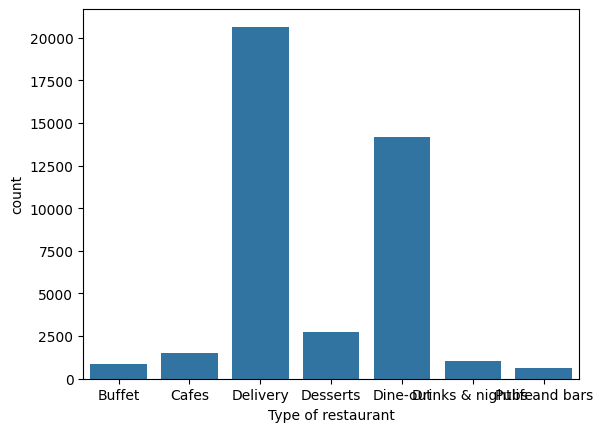

In [16]:
sns.countplot(x=dataframe['listed_in(type)'])
plt.xlabel("Type of restaurant")

**Most preferred restaurant type**

Text(0, 0.5, 'Votes')

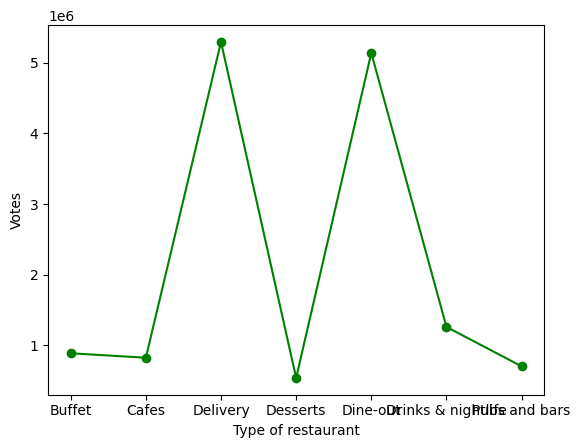

In [17]:
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c='green', marker='o')
plt.xlabel('Type of restaurant')
plt.ylabel('Votes')

**Most Voted Restaurant**

In [18]:
max_votes = dataframe['votes'].max()
restaurant_with_max_votes = dataframe.loc[dataframe['votes'] == max_votes, 'name']

print('Restaurant(s) with the maximum votes:')
print(restaurant_with_max_votes)

Restaurant(s) with the maximum votes:
49170    Byg Brewski Brewing Company
49627    Byg Brewski Brewing Company
50059    Byg Brewski Brewing Company
Name: name, dtype: object


**Online order availability**

<Axes: xlabel='online_order', ylabel='count'>

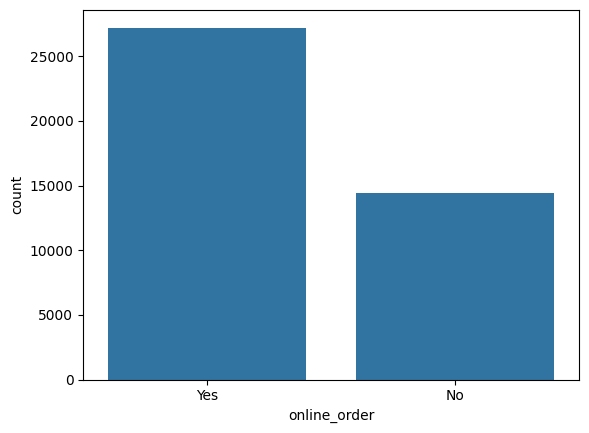

In [19]:
sns.countplot(x=dataframe['online_order'])

**Ratings analyzed**

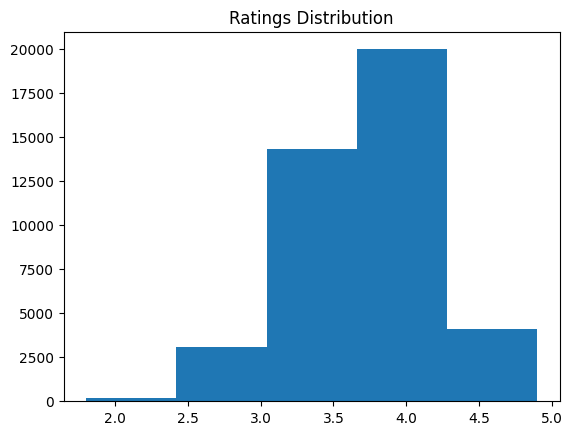

In [20]:
plt.hist(dataframe['rate'],bins=5)
plt.title('Ratings Distribution')
plt.show()

**Approximate cost for two people**

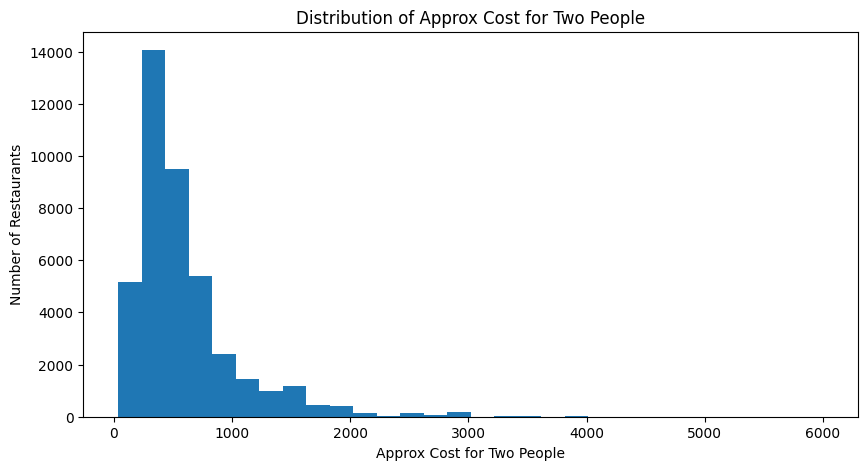

In [23]:
plt.figure(figsize=(10,5))
plt.hist(
    dataframe['approx_cost(for two people)'],
    bins=30
)
plt.xlabel('Approx Cost for Two People')
plt.ylabel('Number of Restaurants')
plt.title('Distribution of Approx Cost for Two People')
plt.show()


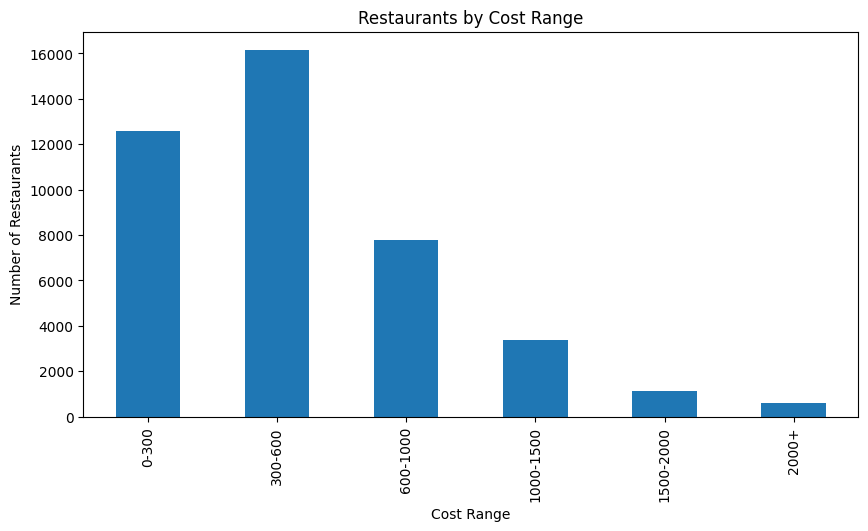

In [24]:
bins = [0, 300, 600, 1000, 1500, 2000, 5000]
labels = ['0-300', '300-600', '600-1000', '1000-1500', '1500-2000', '2000+']

dataframe['cost_range'] = pd.cut(
    dataframe['approx_cost(for two people)'],
    bins=bins,
    labels=labels
)

plt.figure(figsize=(10,5))
dataframe['cost_range'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Cost Range')
plt.ylabel('Number of Restaurants')
plt.title('Restaurants by Cost Range')
plt.show()


**Ratings Comparision**

<Figure size 600x400 with 0 Axes>

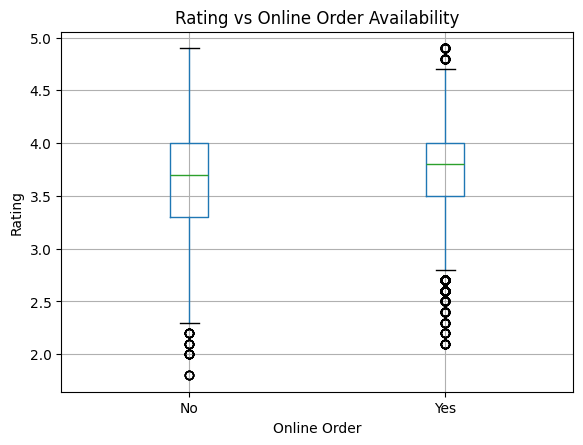

In [26]:
plt.figure(figsize=(6,4))
dataframe.boxplot(column='rate', by='online_order')
plt.title('Rating vs Online Order Availability')
plt.suptitle('')
plt.xlabel('Online Order')
plt.ylabel('Rating')
plt.show()


**Order mode preferences by restaurant type**

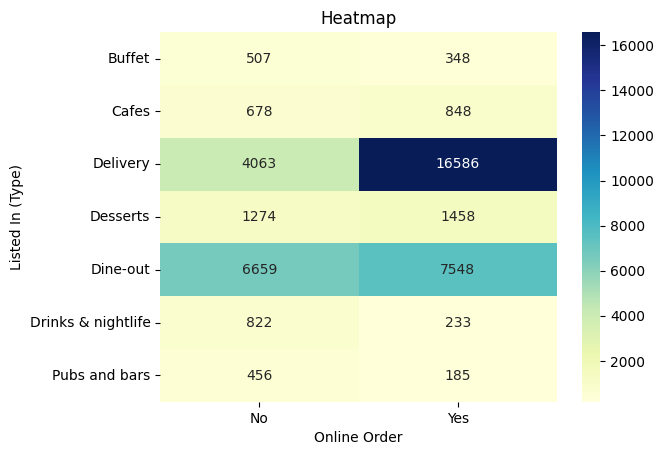

In [27]:
pivot_table = dataframe.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Heatmap')
plt.xlabel('Online Order')
plt.ylabel('Listed In (Type)')
plt.show()